In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Input,Flatten,Softmax,Activation
from tensorflow.keras.models import Sequential

In [2]:
%%time
def create_dataset(img_folder):
    img_data_array = []
    class_name = []
    for dir1 in os.listdir(img_folder):
        path = os.path.join(img_folder,dir1)
        image = cv2.imread(path,cv2.COLOR_BGR2RGB) 
        image = np.resize(image,(64,64,3))
        image = image.astype("float32")
        image = image/255
        img_data_array.append(image)   
        class_name.append(dir1)
    return img_data_array, class_name

Wall time: 0 ns


In [3]:
train_dogs,class_train_dogs = create_dataset(r'C:\Users\G Srinivasa Rao\4.DEEP LEARNING\Main_Projects\Pro_3_train\dogs')
train_cats,class_train_cats = create_dataset(r'C:\Users\G Srinivasa Rao\4.DEEP LEARNING\Main_Projects\Pro_3_train\cats')

In [4]:
x_train = train_dogs + train_cats

In [5]:
test_dogs,class_test_dogs = create_dataset(r'C:\Users\G Srinivasa Rao\4.DEEP LEARNING\Main_Projects\Pro_3_test\dogs')
test_cats,class_test_cats = create_dataset(r'C:\Users\G Srinivasa Rao\4.DEEP LEARNING\Main_Projects\Pro_3_test\cats')

In [6]:
x_test = test_dogs + test_cats

### creating lables for dog:1, cat:0

In [7]:
y_train = [1]*20+[0]*20

In [8]:
y_test = [1]*10+[0]*10

In [9]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
y_train = y_train.astype("uint8")
y_test = y_test.astype("uint8")

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [12]:
print(x_train.shape)
print(x_test.shape)

(40, 64, 64, 3)
(20, 64, 64, 3)


# MODEL

In [13]:
classifier = Sequential()
classifier.add(Input(shape=(64,64,3)))
classifier.add(Conv2D(32,(5,5),activation='relu'))
classifier.add(MaxPool2D(pool_size = (2, 2),strides =2))
classifier.add(Conv2D(64,(5,5),activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2),strides = 2))
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Flatten())
classifier.add(Dense(128,activation="relu"))
classifier.add(Dense(1,activation = "sigmoid"))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 13, 13, 32)        2080      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0

In [14]:
classifier.compile(loss="binary_crossentropy",optimizer = "adam",metrics =["accuracy"])

In [15]:
%%time
model = classifier.fit(x_train,y_train,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
2/2 [==============================] - 2s 456ms/step - loss: 0.7068 - accuracy: 0.4750 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 216ms/step - loss: 0.6983 - accuracy: 0.5250 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 203ms/step - loss: 0.6769 - accuracy: 0.5250 - val_loss: 0.7760 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 206ms/step - loss: 0.6983 - accuracy: 0.5000 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 209ms/step - loss: 0.6998 - accuracy: 0.5000 - val_loss: 0.7300 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 206ms/step - loss: 0.7278 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 1s 216ms/step - loss: 0.6604 - accuracy: 0.6500 - val_loss: 0.6989 - val_accuracy: 0.5500
Epoch 8/100
2

Epoch 59/100
2/2 [==============================] - 1s 200ms/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 60/100
2/2 [==============================] - 1s 197ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.7429 - val_accuracy: 0.5000
Epoch 61/100
2/2 [==============================] - 1s 213ms/step - loss: 0.0392 - accuracy: 0.9750 - val_loss: 0.7166 - val_accuracy: 0.5500
Epoch 62/100
2/2 [==============================] - 1s 199ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.6802 - val_accuracy: 0.6000
Epoch 63/100
2/2 [==============================] - 1s 202ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.6794 - val_accuracy: 0.6000
Epoch 64/100
2/2 [==============================] - 1s 201ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.7003 - val_accuracy: 0.6000
Epoch 65/100
2/2 [==============================] - 1s 200ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.7491 - val_accuracy: 0.6000
Epoch 

In [16]:
classifier_2 = Sequential()
classifier_2.add(Input(shape=(64,64,3)))
classifier_2.add(Conv2D(32,(5,5),activation='relu'))
classifier_2.add(MaxPool2D(pool_size = (2, 2),strides =2))
classifier_2.add(Conv2D(64,(5,5),activation = 'relu'))
classifier_2.add(MaxPool2D(pool_size = (2, 2),strides = 2))
classifier_2.add(Dense(32, activation = 'relu'))
classifier_2.add(Dropout(0.4))
classifier_2.add(Flatten())
classifier_2.add(Dense(128,activation="relu"))
classifier_2.add(Dense(1,activation = "sigmoid"))
classifier_2.summary()
classifier_2.compile(loss="binary_crossentropy",optimizer = "adam",metrics =["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dense_3 (Dense)             (None, 13, 13, 32)        2080      
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)       

In [17]:
%%time
model_2 = classifier_2.fit(x_train,y_train,epochs=200,verbose=1,validation_data=(x_test,y_test))

Epoch 1/200
2/2 [==============================] - 3s 725ms/step - loss: 0.7546 - accuracy: 0.4250 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 1s 270ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 1s 497ms/step - loss: 0.6993 - accuracy: 0.5000 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 1s 249ms/step - loss: 0.6910 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 1s 294ms/step - loss: 0.6875 - accuracy: 0.5000 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 1s 219ms/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.7052 - val_accuracy: 0.4500
Epoch 7/200
2/2 [==============================] - 1s 235ms/step - loss: 0.6784 - accuracy: 0.5000 - val_loss: 0.7118 - val_accuracy: 0.4500
Epoch 8/200
2

Epoch 59/200
2/2 [==============================] - 1s 249ms/step - loss: 0.1366 - accuracy: 0.9500 - val_loss: 0.9737 - val_accuracy: 0.6000
Epoch 60/200
2/2 [==============================] - 1s 229ms/step - loss: 0.1358 - accuracy: 0.9250 - val_loss: 1.0274 - val_accuracy: 0.5500
Epoch 61/200
2/2 [==============================] - 1s 221ms/step - loss: 0.0987 - accuracy: 0.9750 - val_loss: 1.2577 - val_accuracy: 0.4000
Epoch 62/200
2/2 [==============================] - 1s 227ms/step - loss: 0.1174 - accuracy: 0.9750 - val_loss: 1.3541 - val_accuracy: 0.4000
Epoch 63/200
2/2 [==============================] - 1s 230ms/step - loss: 0.0770 - accuracy: 0.9750 - val_loss: 1.3572 - val_accuracy: 0.4000
Epoch 64/200
2/2 [==============================] - 1s 205ms/step - loss: 0.0686 - accuracy: 0.9750 - val_loss: 1.4140 - val_accuracy: 0.4000
Epoch 65/200
2/2 [==============================] - 1s 224ms/step - loss: 0.0832 - accuracy: 0.9750 - val_loss: 2.0275 - val_accuracy: 0.4500
Epoch 

2/2 [==============================] - 1s 228ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 2.2790 - val_accuracy: 0.6000
Epoch 117/200
2/2 [==============================] - 1s 220ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 2.2355 - val_accuracy: 0.6500
Epoch 118/200
2/2 [==============================] - 1s 224ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 2.2377 - val_accuracy: 0.5500
Epoch 119/200
2/2 [==============================] - 1s 274ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 2.2581 - val_accuracy: 0.5500
Epoch 120/200
2/2 [==============================] - 1s 220ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 2.3105 - val_accuracy: 0.5500
Epoch 121/200
2/2 [==============================] - 1s 214ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.3800 - val_accuracy: 0.5500
Epoch 122/200
2/2 [==============================] - 1s 215ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.4657 - val_accuracy: 0.5500
Epoch 123/200

2/2 [==============================] - 1s 203ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.0012 - val_accuracy: 0.5500
Epoch 174/200
2/2 [==============================] - 1s 203ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 2.9897 - val_accuracy: 0.5500
Epoch 175/200
2/2 [==============================] - 1s 202ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.9794 - val_accuracy: 0.5500
Epoch 176/200
2/2 [==============================] - 1s 206ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.9881 - val_accuracy: 0.6500
Epoch 177/200
2/2 [==============================] - 1s 210ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.0119 - val_accuracy: 0.6500
Epoch 178/200
2/2 [==============================] - 1s 199ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.0416 - val_accuracy: 0.7000
Epoch 179/200
2/2 [==============================] - 1s 203ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 3.0692 - val_accuracy: 0.7000
Epoch 180/200

In [18]:
classifier_3 = Sequential()
classifier_3.add(Input(shape=(64,64,3)))
classifier_3.add(Conv2D(32,(5,5),activation='relu'))
classifier_3.add(MaxPool2D(pool_size = (2, 2),strides =2))
classifier_3.add(Conv2D(64,(5,5),activation = 'relu'))
classifier_3.add(MaxPool2D(pool_size = (2, 2),strides = 2))
classifier_3.add(Dense(32, activation = 'relu'))
classifier_3.add(Dropout(0.4))
classifier_3.add(Flatten())
classifier_3.add(Dense(128,activation="relu"))
classifier_3.add(Dense(1,activation = "sigmoid"))
classifier_3.summary()
classifier_3.compile(loss="binary_crossentropy",optimizer = "adam",metrics =["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dense_6 (Dense)             (None, 13, 13, 32)        2080      
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)       

In [19]:
%%time
model_3 = classifier_3.fit(x_train,y_train,epochs=300,verbose=1,validation_data=(x_test,y_test))

Epoch 1/300
2/2 [==============================] - 2s 381ms/step - loss: 0.7458 - accuracy: 0.4000 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 1s 203ms/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 1s 200ms/step - loss: 0.6871 - accuracy: 0.5750 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 1s 201ms/step - loss: 0.7035 - accuracy: 0.4750 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 1s 204ms/step - loss: 0.6800 - accuracy: 0.5500 - val_loss: 0.7195 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 1s 199ms/step - loss: 0.6763 - accuracy: 0.5250 - val_loss: 0.7026 - val_accuracy: 0.4000
Epoch 7/300
2/2 [==============================] - 1s 215ms/step - loss: 0.6606 - accuracy: 0.7000 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 8/300
2

Epoch 59/300
2/2 [==============================] - 1s 199ms/step - loss: 0.1401 - accuracy: 0.9000 - val_loss: 1.1292 - val_accuracy: 0.5500
Epoch 60/300
2/2 [==============================] - 1s 197ms/step - loss: 0.0600 - accuracy: 0.9750 - val_loss: 1.6029 - val_accuracy: 0.5000
Epoch 61/300
2/2 [==============================] - 1s 196ms/step - loss: 0.1601 - accuracy: 0.9750 - val_loss: 1.3328 - val_accuracy: 0.5500
Epoch 62/300
2/2 [==============================] - 1s 207ms/step - loss: 0.0510 - accuracy: 1.0000 - val_loss: 1.2960 - val_accuracy: 0.5000
Epoch 63/300
2/2 [==============================] - 1s 205ms/step - loss: 0.0549 - accuracy: 0.9750 - val_loss: 1.3557 - val_accuracy: 0.5000
Epoch 64/300
2/2 [==============================] - 1s 208ms/step - loss: 0.0589 - accuracy: 0.9750 - val_loss: 1.3981 - val_accuracy: 0.5000
Epoch 65/300
2/2 [==============================] - 1s 205ms/step - loss: 0.0591 - accuracy: 0.9750 - val_loss: 1.3413 - val_accuracy: 0.5500
Epoch 

2/2 [==============================] - 1s 199ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.1694 - val_accuracy: 0.4500
Epoch 117/300
2/2 [==============================] - 1s 200ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.2406 - val_accuracy: 0.4500
Epoch 118/300
2/2 [==============================] - 1s 194ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.2787 - val_accuracy: 0.4500
Epoch 119/300
2/2 [==============================] - 1s 196ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.2755 - val_accuracy: 0.4500
Epoch 120/300
2/2 [==============================] - 1s 200ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.2628 - val_accuracy: 0.5000
Epoch 121/300
2/2 [==============================] - 1s 199ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.1525 - val_accuracy: 0.4500
Epoch 122/300
2/2 [==============================] - 1s 201ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1018 - val_accuracy: 0.4500
Epoch 123/300

2/2 [==============================] - 1s 200ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.1554 - val_accuracy: 0.4000
Epoch 174/300
2/2 [==============================] - 1s 209ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.1145 - val_accuracy: 0.4500
Epoch 175/300
2/2 [==============================] - 1s 200ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0703 - val_accuracy: 0.4000
Epoch 176/300
2/2 [==============================] - 1s 198ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.0412 - val_accuracy: 0.4000
Epoch 177/300
2/2 [==============================] - 1s 211ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.0247 - val_accuracy: 0.3500
Epoch 178/300
2/2 [==============================] - 1s 201ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0160 - val_accuracy: 0.3500
Epoch 179/300
2/2 [==============================] - 1s 205ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0114 - val_accuracy: 0.3500
Epoch 180/300

Epoch 230/300
2/2 [==============================] - 1s 212ms/step - loss: 8.0318e-04 - accuracy: 1.0000 - val_loss: 2.4024 - val_accuracy: 0.4000
Epoch 231/300
2/2 [==============================] - 1s 199ms/step - loss: 7.8311e-04 - accuracy: 1.0000 - val_loss: 2.4032 - val_accuracy: 0.4000
Epoch 232/300
2/2 [==============================] - 1s 200ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.3994 - val_accuracy: 0.4000
Epoch 233/300
2/2 [==============================] - 1s 197ms/step - loss: 7.4536e-04 - accuracy: 1.0000 - val_loss: 2.3954 - val_accuracy: 0.4000
Epoch 234/300
2/2 [==============================] - 1s 199ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.3942 - val_accuracy: 0.4000
Epoch 235/300
2/2 [==============================] - 1s 196ms/step - loss: 8.4581e-04 - accuracy: 1.0000 - val_loss: 2.3902 - val_accuracy: 0.4000
Epoch 236/300
2/2 [==============================] - 1s 199ms/step - loss: 3.7709e-04 - accuracy: 1.0000 - val_loss: 2.3865 - 

Epoch 286/300
2/2 [==============================] - 1s 203ms/step - loss: 4.0999e-04 - accuracy: 1.0000 - val_loss: 2.4951 - val_accuracy: 0.4000
Epoch 287/300
2/2 [==============================] - 1s 198ms/step - loss: 2.3189e-04 - accuracy: 1.0000 - val_loss: 2.4945 - val_accuracy: 0.4000
Epoch 288/300
2/2 [==============================] - 1s 196ms/step - loss: 9.8433e-05 - accuracy: 1.0000 - val_loss: 2.4958 - val_accuracy: 0.4000
Epoch 289/300
2/2 [==============================] - 1s 203ms/step - loss: 5.7586e-04 - accuracy: 1.0000 - val_loss: 2.4945 - val_accuracy: 0.4000
Epoch 290/300
2/2 [==============================] - 1s 197ms/step - loss: 1.2660e-04 - accuracy: 1.0000 - val_loss: 2.4936 - val_accuracy: 0.3500
Epoch 291/300
2/2 [==============================] - 1s 198ms/step - loss: 1.4179e-04 - accuracy: 1.0000 - val_loss: 2.4930 - val_accuracy: 0.3500
Epoch 292/300
2/2 [==============================] - 1s 198ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.498

In [20]:
from matplotlib import pyplot as plt

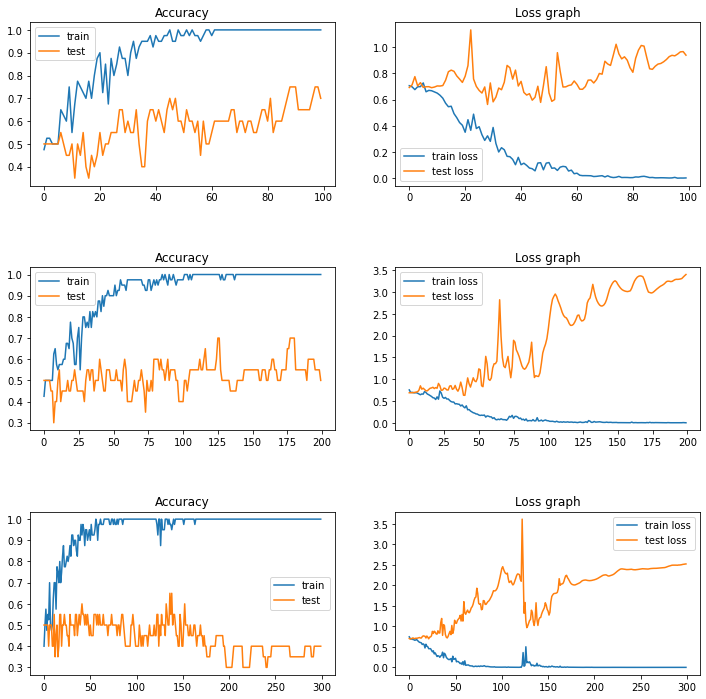

In [21]:
plt.figure(figsize =(12,12))
plt.subplots_adjust(hspace = 0.5)

plt.subplot(3,2,1)
plt.title("Accuracy")
plt.plot(model.history["accuracy"],label = "train")
plt.plot(model.history["val_accuracy"],label = "test")
plt.legend()

plt.subplot(3,2,2)
plt.title("Loss graph")
plt.plot(model.history["loss"],label = "train loss")
plt.plot(model.history["val_loss"],label = "test loss")
plt.legend()

plt.subplot(3,2,3)
plt.title("Accuracy")
plt.plot(model_2.history["accuracy"],label = "train")
plt.plot(model_2.history["val_accuracy"],label = "test")
plt.legend()

plt.subplot(3,2,4)
plt.title("Loss graph")
plt.plot(model_2.history["loss"],label = "train loss")
plt.plot(model_2.history["val_loss"],label = "test loss")
plt.legend()

plt.subplot(3,2,5)
plt.title("Accuracy")
plt.plot(model_3.history["accuracy"],label = "train")
plt.plot(model_3.history["val_accuracy"],label = "test")
plt.legend()

plt.subplot(3,2,6)
plt.title("Loss graph")
plt.plot(model_3.history["loss"],label = "train loss")
plt.plot(model_3.history["val_loss"],label = "test loss")
plt.legend()

### final accuracy for model,model_2 & model_3 are 100% each respectively
### validation loss is 0.93,3.40,2.52 correspondingly